<a href="https://colab.research.google.com/github/SarveshD7/Facial-Keypoint-Recognition/blob/main/FacialKeypointDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Installing Kaggle API***

---



In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Downloading the Kaggle dataset***
---



In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "sarvesh5703"
os.environ['KAGGLE_KEY'] = "4a9953ceeae77a2075f8a62d6a99d5e7"

!kaggle competitions download -c facial-keypoints-detection -p data

 92% 70.0M/76.3M [00:00<00:00, 118MB/s]
100% 76.3M/76.3M [00:00<00:00, 99.9MB/s]


In [ ]:
! unzip data/facial-keypoints-detection.zip -d data


Archive:  data/facial-keypoints-detection.zip
  inflating: data/IdLookupTable.csv  
  inflating: data/SampleSubmission.csv  
  inflating: data/test.zip           
  inflating: data/training.zip       


In [ ]:
! unzip data/training.zip -d data
! unzip data/test.zip -d data

Archive:  data/training.zip
  inflating: data/training.csv       
Archive:  data/test.zip
  inflating: data/test.csv           


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
%matplotlib inline

In [ ]:
os.chdir("/content/data/")
print("Before - CWD ->", os.getcwd())
data_dir = os.getcwd()

train_data = pd.read_csv(data_dir + '/' + 'training.csv')
test_csv = pd.read_csv(data_dir + '/' + 'test.csv')
Id_table_path_csv = pd.read_csv(data_dir + '/' + 'IdLookupTable.csv')

Before - CWD -> /content/data


In [ ]:

# viewing the data
train_data.T

,0,1,2,3,4,5,6,7,8,9,...,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301,69.680748,64.131866,67.468893,65.80288,64.121231,...,69.229935,63.352951,65.711151,67.929319,66.867222,67.402546,66.1344,66.690732,70.965082,66.938311
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261,39.968748,34.29004,39.413452,34.7552,36.740308,...,38.575634,35.671311,38.843545,35.846552,37.356855,31.842551,38.365501,36.845221,39.853666,43.42451
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481,29.183551,29.578953,29.355961,27.47584,29.468923,...,29.407912,33.952078,32.268751,28.68782,30.750926,29.746749,30.478626,31.66642,30.543285,31.096059
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032,37.563364,33.13804,39.621717,36.1856,38.390154,...,38.34545,40.816448,37.706043,41.452484,40.115743,38.632942,39.950198,39.685042,40.772339,39.528604
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589,62.864299,57.797154,59.554951,58.65216,58.620923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left_eye_inner_corner_y,39.647423,35.274349,36.320968,39.127179,39.621261,40.169271,35.15404,40.454773,37.32928,37.840615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left_eye_outer_corner_x,73.130346,70.722723,70.984421,72.314713,72.515926,76.898243,69.026577,75.591612,72.95296,71.272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left_eye_outer_corner_y,39.969997,36.187166,36.320968,38.380967,39.884466,41.171888,34.29004,40.038245,35.89952,37.290338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
right_eye_inner_corner_x,36.356571,36.034723,37.678105,37.618643,36.98238,36.401047,34.761664,37.478214,36.3424,36.344615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
right_eye_inner_corner_y,37.389402,34.361532,36.320968,38.754115,39.094852,39.367626,33.71404,40.454773,37.0432,39.490462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
feature_8 =['left_eye_center_x','left_eye_center_y','right_eye_center_x','right_eye_center_y','nose_tip_x','nose_tip_y','mouth_center_bottom_lip_x','mouth_center_bottom_lip_y', 'Image']
#Create 2 different datasets.
train_8_csv = train_data[feature_8].dropna().reset_index()
train_30_csv = train_data.dropna().reset_index()

In [ ]:
train_data.info

<bound method DataFrame.info of       left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.033564          39.002274           30.227008   
1             64.332936          34.970077           29.949277   
2             65.057053          34.909642           30.903789   
3             65.225739          37.261774           32.023096   
4             66.725301          39.621261           32.244810   
...                 ...                ...                 ...   
7044          67.402546          31.842551           29.746749   
7045          66.134400          38.365501           30.478626   
7046          66.690732          36.845221           31.666420   
7047          70.965082          39.853666           30.543285   
7048          66.938311          43.424510           31.096059   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0              36.421678                59.582075                39.647423   
1              33.4

In [ ]:
train_8_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      7000 non-null   int64  
 1   left_eye_center_x          7000 non-null   float64
 2   left_eye_center_y          7000 non-null   float64
 3   right_eye_center_x         7000 non-null   float64
 4   right_eye_center_y         7000 non-null   float64
 5   nose_tip_x                 7000 non-null   float64
 6   nose_tip_y                 7000 non-null   float64
 7   mouth_center_bottom_lip_x  7000 non-null   float64
 8   mouth_center_bottom_lip_y  7000 non-null   float64
 9   Image                      7000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 547.0+ KB


In [ ]:
train_30_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      2140 non-null   int64  
 1   left_eye_center_x          2140 non-null   float64
 2   left_eye_center_y          2140 non-null   float64
 3   right_eye_center_x         2140 non-null   float64
 4   right_eye_center_y         2140 non-null   float64
 5   left_eye_inner_corner_x    2140 non-null   float64
 6   left_eye_inner_corner_y    2140 non-null   float64
 7   left_eye_outer_corner_x    2140 non-null   float64
 8   left_eye_outer_corner_y    2140 non-null   float64
 9   right_eye_inner_corner_x   2140 non-null   float64
 10  right_eye_inner_corner_y   2140 non-null   float64
 11  right_eye_outer_corner_x   2140 non-null   float64
 12  right_eye_outer_corner_y   2140 non-null   float64
 13  left_eyebrow_inner_end_x   2140 non-null   float

# ***Now we have two datasets One with 7000 values and 8 features and other with 2140 values with 15 features and no null values in both***

---



In [ ]:
# conversion of data from 1d stirng to 3d array
# Output - (96,96, 1)
def str_to_array(pd_series):
    data_size = len(pd_series)
    X = np.zeros(shape=(data_size,96,96,1), dtype=np.float32)
    for i in tqdm(range(data_size)):
       img_str = pd_series[i]
       img_list = img_str.split(' ')
       img_array = np.array(img_list, dtype=np.float32)
       img_array = img_array.reshape(96,96,1)
       X[i] = img_array
    return X

In [ ]:
X_train_30 = str_to_array(train_30_csv['Image'])
labels_30 =  train_30_csv.drop(['index','Image'], axis=1)
y_train_30 = labels_30.to_numpy(dtype=np.float32)
X_train_8 = str_to_array(train_8_csv['Image'])
labels_8 =  train_8_csv.drop(['index','Image'], axis=1)
y_train_8 = labels_8.to_numpy(dtype=np.float32)

100%|██████████| 7000/7000 [00:14<00:00, 495.60it/s]


# ***Plotting the training images and keypoints***

---

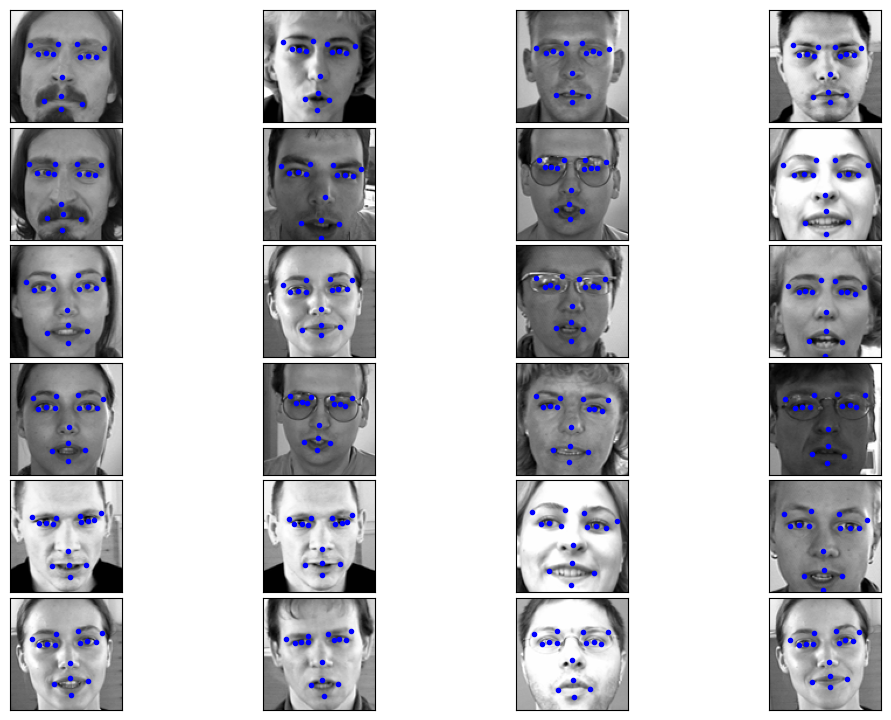

In [ ]:
def plot_face_pts(img, pts):
    plt.imshow(img[:,:,0], cmap='gray')
    for i in range(1,31,2):
       plt.plot(pts[i-1], pts[i], 'b.')
fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(24):
   ax = fig.add_subplot(6, 4, i + 1, xticks=[], yticks=[])
   plot_face_pts(X_train_30[i], y_train_30[i])
plt.show()

In [ ]:
from keras.layers import InputLayer, Conv2D, LeakyReLU, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential

In [ ]:
def create_model(output_n = 30):
  model = Sequential([
  InputLayer(input_shape=[96,96,1]),
  Conv2D(filters=32, kernel_size=[5,5],padding='same', use_bias=False),
  LeakyReLU(alpha = .1),
  BatchNormalization(),
  Conv2D(filters=32, kernel_size=[5,5], padding='same', use_bias=False),
  LeakyReLU(alpha = .1),
  BatchNormalization(),
  MaxPool2D(pool_size=[2,2]),
  Conv2D(filters=64, kernel_size=[3,3], padding='same', use_bias=False),
  LeakyReLU(alpha = .1),
  BatchNormalization(),
  Conv2D(filters=64, kernel_size=[3,3], padding='same', use_bias=False),
  LeakyReLU(alpha = .1),
  BatchNormalization(),
  MaxPool2D(pool_size=[2,2]),
  Conv2D(filters=128, kernel_size=[3,3], padding='same', use_bias=False),
  LeakyReLU(alpha = .1),
  BatchNormalization(),
  Conv2D(filters=128, kernel_size=[3,3], padding='same', use_bias=False),
  LeakyReLU(alpha = .1),
  BatchNormalization(),
  MaxPool2D(pool_size=[2,2]),
  Conv2D(filters=256, kernel_size=[3,3], padding='same', use_bias=False),
  LeakyReLU(alpha = .1),
  BatchNormalization(),
  Conv2D(filters=256, kernel_size=[3,3], padding='same', use_bias=False),
  LeakyReLU(alpha = .1),
  BatchNormalization(),
  MaxPool2D(pool_size=[2,2]),
  Conv2D(filters=512, kernel_size=[3,3], padding='same', use_bias=False),
  LeakyReLU(alpha = .1),
  BatchNormalization(),
  Conv2D(filters=512, kernel_size=[3,3], padding='same', use_bias=False),
  LeakyReLU(alpha = .1),
  BatchNormalization(),
  Flatten(),
  Dense(units=512, activation='relu'),
  Dropout(.1),
  Dense(units=output_n),

  ])
  model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])
  return model

In [ ]:
model_30 = create_model(30)
model_8 = create_model(8)

In [ ]:
model_30.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        800       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        25600     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 32)       128       
 hNormalization)                                        

In [ ]:
model_8.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 96, 96, 32)        800       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_10 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 96, 96, 32)        25600     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                     

In [ ]:
history = model_30.fit(X_train_30, y_train_30, validation_split = 0.1, batch_size = 64, epochs = 10)

Epoch 1/10
31/31 [==============================] - 368s 12s/step - loss: 236.6639 - mae: 10.0381 - val_loss: 1452.6128 - val_mae: 31.9082
Epoch 2/10
31/31 [==============================] - 353s 11s/step - loss: 34.0938 - mae: 4.6209 - val_loss: 540.6769 - val_mae: 21.0588
Epoch 3/10
31/31 [==============================] - 350s 11s/step - loss: 27.1065 - mae: 4.1194 - val_loss: 116.3237 - val_mae: 9.3945
Epoch 4/10
31/31 [==============================] - 359s 12s/step - loss: 25.7943 - mae: 4.0037 - val_loss: 51.4693 - val_mae: 5.9170
Epoch 5/10
31/31 [==============================] - 353s 11s/step - loss: 22.9234 - mae: 3.7891 - val_loss: 25.2912 - val_mae: 3.9588
Epoch 6/10
31/31 [==============================] - 353s 11s/step - loss: 20.6495 - mae: 3.5911 - val_loss: 24.0729 - val_mae: 3.8651
Epoch 7/10
31/31 [==============================] - 365s 12s/step - loss: 19.8351 - mae: 3.5053 - val_loss: 18.1657 - val_mae: 3.2616
Epoch 8/10
31/31 [==============================] - 34

In [ ]:
print("Current Working directory ->", os.getcwd())
model_30.save("/content/Model_30")

Current Working directory -> /content


In [ ]:
!cp -r /content/Model_30 /content/drive/MyDrive/Model_30/

In [ ]:
history2 = model_8.fit(X_train_8, y_train_8, validation_split=0.1, batch_size=64, epochs = 10)

Epoch 1/10
99/99 [==============================] - 1076s 11s/step - loss: 98.3949 - mae: 5.6996 - val_loss: 245.7106 - val_mae: 14.5306
Epoch 2/10
99/99 [==============================] - 1062s 11s/step - loss: 22.0651 - mae: 3.6162 - val_loss: 33.3080 - val_mae: 4.3518
Epoch 3/10
99/99 [==============================] - 1062s 11s/step - loss: 18.2023 - mae: 3.2931 - val_loss: 23.2447 - val_mae: 3.4048
Epoch 4/10
99/99 [==============================] - 1063s 11s/step - loss: 17.2210 - mae: 3.1999 - val_loss: 14.2188 - val_mae: 2.6220
Epoch 5/10
99/99 [==============================] - 1059s 11s/step - loss: 15.0647 - mae: 2.9819 - val_loss: 15.5555 - val_mae: 2.7268
Epoch 6/10
99/99 [==============================] - 1072s 11s/step - loss: 14.7416 - mae: 2.9584 - val_loss: 10.0433 - val_mae: 1.9055
Epoch 7/10
99/99 [==============================] - 1050s 11s/step - loss: 13.8207 - mae: 2.8697 - val_loss: 12.0790 - val_mae: 2.3404
Epoch 8/10
99/99 [==============================] - 1

In [ ]:
model_8.save("/content/Model_8")
! cp -r /content/Model_8 /content/drive/MyDrive/Model_8/

# ***Viaualizing the training and validation loss***

---



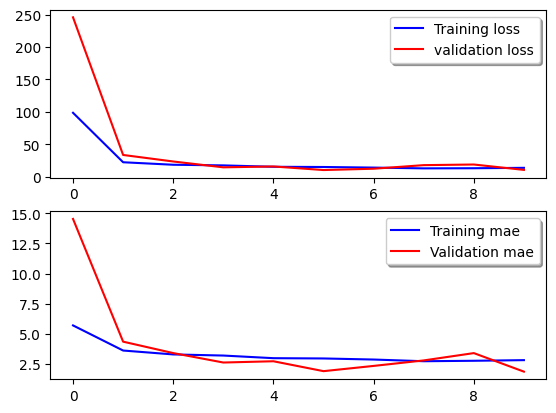

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history2.history['loss'], color='b', label="Training loss")
ax[0].plot(history2.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history2.history['mae'], color='b', label="Training mae")
ax[1].plot(history2.history['val_mae'],color='r',label="Validation mae")
legend = ax[1].legend(loc='best', shadow=True)

# ***Testing***

---



In [ ]:
!cp -r /content/drive/MyDrive/Model_30/ /content/Model_30

In [ ]:
model_30 = keras.models.load_model("/content/Model_30")

In [ ]:
X_test = str_to_array(test_csv['Image'])

#Pridect points for each image using 2 different model.

y_hat_30 = model_30.predict(X_test)
y_hat_8 = model_8.predict(X_test)

100%|██████████| 1783/1783 [00:03<00:00, 464.73it/s]


56/56 [==============================] - 66s 1s/step


In [ ]:
feature_8_ind = [0, 1, 2, 3, 20, 21, 28, 29]
#Merge 2 prediction from y_hat_30 and y_hat_8.
for i in range(8):
   print('Copy "{}" feature column from y_hat_8 y_hat_30'.format(feature_8[i]))
y_hat_30[:,feature_8_ind[i]] = y_hat_8[:,i]

Copy "left_eye_center_x" feature column from y_hat_8 y_hat_30
Copy "left_eye_center_y" feature column from y_hat_8 y_hat_30
Copy "right_eye_center_x" feature column from y_hat_8 y_hat_30
Copy "right_eye_center_y" feature column from y_hat_8 y_hat_30
Copy "nose_tip_x" feature column from y_hat_8 y_hat_30
Copy "nose_tip_y" feature column from y_hat_8 y_hat_30
Copy "mouth_center_bottom_lip_x" feature column from y_hat_8 y_hat_30
Copy "mouth_center_bottom_lip_y" feature column from y_hat_8 y_hat_30


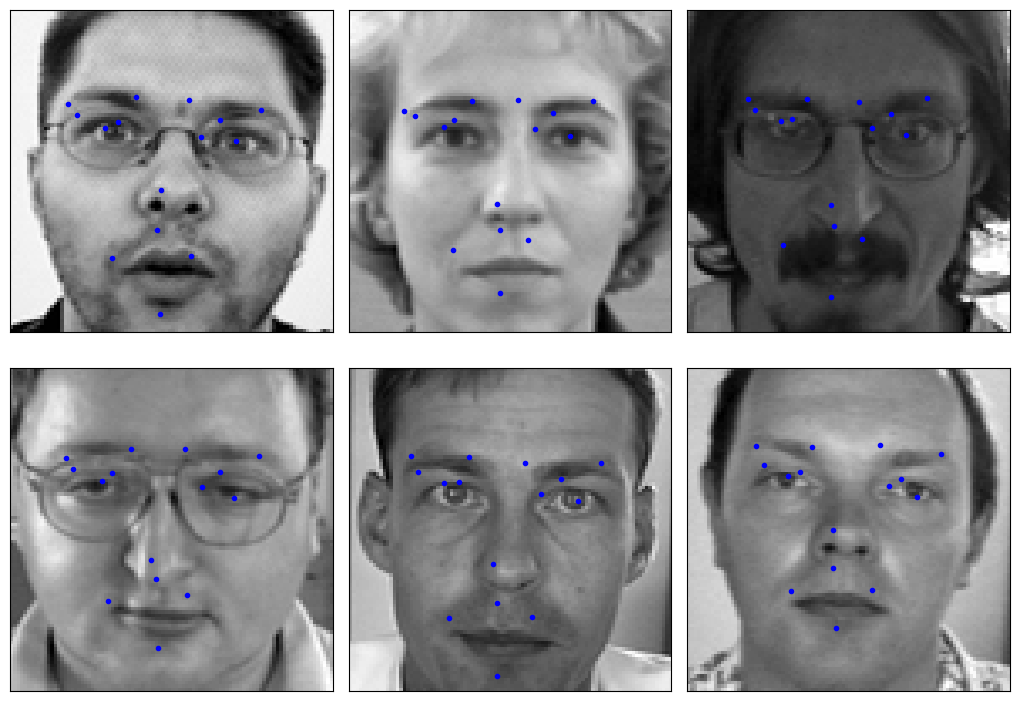

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(
left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i, f in enumerate(range(10,16)):
  ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
  plot_face_pts(X_test[f], y_hat_30[f])
plt.show()


In [ ]:
X_test.shape

(1783, 96, 96, 1)

In [ ]:
X_test[0]

array([[[182.],
        [183.],
        [182.],
        ...,
        [182.],
        [182.],
        [182.]],

       [[182.],
        [181.],
        [181.],
        ...,
        [182.],
        [182.],
        [182.]],

       [[182.],
        [181.],
        [180.],
        ...,
        [182.],
        [181.],
        [182.]],

       ...,

       [[ 42.],
        [ 36.],
        [ 20.],
        ...,
        [126.],
        [136.],
        [153.]],

       [[ 31.],
        [  8.],
        [  0.],
        ...,
        [  9.],
        [ 11.],
        [ 33.]],

       [[  3.],
        [  0.],
        [  1.],
        ...,
        [  8.],
        [  5.],
        [  5.]]], dtype=float32)

In [ ]:
import cv2
test = cv2.imread("/content/face.jpg")
out =  cv2.imread("/content/face.jpg")

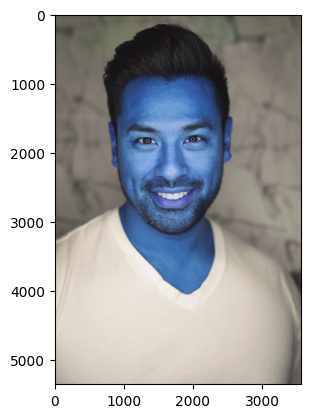

In [ ]:
plt.imshow(test)

In [ ]:
test

array([[[ 99,  97,  87],
        [100,  98,  88],
        [101,  99,  89],
        ...,
        [ 93,  91,  81],
        [ 94,  92,  82],
        [ 96,  94,  84]],

       [[102, 100,  90],
        [102, 100,  90],
        [101,  99,  89],
        ...,
        [ 97,  95,  85],
        [ 96,  94,  84],
        [ 98,  96,  86]],

       [[103, 101,  91],
        [102, 100,  90],
        [100,  98,  88],
        ...,
        [ 96,  94,  84],
        [ 94,  92,  82],
        [ 93,  91,  81]],

       ...,

       [[176, 169, 160],
        [177, 170, 161],
        [177, 170, 161],
        ...,
        [104,  99,  96],
        [104,  99,  96],
        [106, 101,  98]],

       [[178, 171, 162],
        [178, 171, 162],
        [178, 171, 162],
        ...,
        [106, 101,  98],
        [106, 101,  98],
        [106, 101,  98]],

       [[178, 171, 162],
        [179, 172, 163],
        [178, 171, 162],
        ...,
        [106, 101,  98],
        [106, 101,  98],
        [107, 102,  99]]

In [ ]:
test.shape

(5354, 3569, 3)

In [ ]:
test.shape

(5354, 3569, 3)

In [ ]:
test = cv2.resize(test, (96,96))

In [ ]:
test.shape

(96, 96, 3)

In [ ]:
test  = np.expand_dims(test, axis = 0)

In [ ]:
test.shape

(1, 96, 96, 3)

In [ ]:
# test  = np.expand_dims(test, axis = 0)
# test.shape

In [ ]:
test_new = test[:,:,:,1]
test_new.shape

(1, 96, 96)

In [ ]:
test2 = np.expand_dims(test_new, axis = 3)

In [ ]:
test2.shape

(1, 96, 96, 1)

In [ ]:
y_hat_30 = model_30.predict(test2)
y_hat_8 = model_8.predict(test2)

1/1 [==============================] - 0s 76ms/step


In [ ]:
feature_8_ind = [0, 1, 2, 3, 20, 21, 28, 29]
#Merge 2 prediction from y_hat_30 and y_hat_8.
for i in range(8):
   print('Copy "{}" feature column from y_hat_8 y_hat_30'.format(feature_8[i]))
y_hat_30[:,feature_8_ind[i]] = y_hat_8[:,i]

Copy "left_eye_center_x" feature column from y_hat_8 y_hat_30
Copy "left_eye_center_y" feature column from y_hat_8 y_hat_30
Copy "right_eye_center_x" feature column from y_hat_8 y_hat_30
Copy "right_eye_center_y" feature column from y_hat_8 y_hat_30
Copy "nose_tip_x" feature column from y_hat_8 y_hat_30
Copy "nose_tip_y" feature column from y_hat_8 y_hat_30
Copy "mouth_center_bottom_lip_x" feature column from y_hat_8 y_hat_30
Copy "mouth_center_bottom_lip_y" feature column from y_hat_8 y_hat_30


In [ ]:
print(feature_8[0], y_hat_30[:, 0])
print(feature_8[1], y_hat_30[:, 1])
print(feature_8[2], y_hat_30[:, 2])
print(feature_8[3], y_hat_30[:, 3])


left_eye_center_x 54.33926
left_eye_center_y [29.09648]
right_eye_center_x [30.321125]
right_eye_center_y [34.09783]


In [ ]:
left_eye_center_x = int(y_hat_30[:, 0][0])
left_eye_center_y = int(y_hat_30[:, 1][0])
right_eye_center_x = int(y_hat_30[:, 2][0])
right_eye_center_y = int(y_hat_30[:, 3][0])

In [ ]:
out.shape

(96, 96, 3)

In [ ]:
linedFace = cv2.line(out, (left_eye_center_x, left_eye_center_x), (right_eye_center_x, right_eye_center_y), (255,0,0), 1)

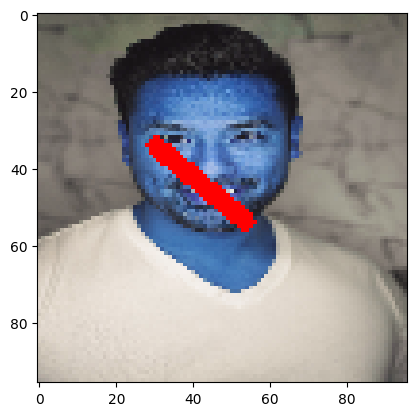

In [ ]:
plt.imshow(linedFace)